In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [55]:
%%writefile content.json
{
  "intents": [
    {
      "tag": "greeting",
      "patterns": [
        "Hi",
        "Hey",
        "How are you",
        "Is anyone there?",
        "Hello",
        "Good day"
      ],
      "responses": [
        "Hey :-)",
        "Hello, thanks for visiting",
        "Hi there, what can I do for you?",
        "Hi there, how can I help?"
      ]
    },
    {
      "tag": "goodbye",
      "patterns": ["Bye", "See you later", "Goodbye"],
      "responses": [
        "See you later, thanks for visiting",
        "Have a nice day",
        "Bye! Come back again soon."
      ]
    },
    {
      "tag": "thanks",
      "patterns": ["Thanks", "Thank you", "That's helpful", "Thank's a lot!"],
      "responses": ["Happy to help!", "Any time!", "My pleasure"]
    },
    {
      "tag": "Admission",
      "patterns": [
        "when does fast offers admission?",
        "when does fast starts admission?",
        "What does admission open ?"
      ],
      "responses": [
        "Fast offers Admission in june and july every year",
        "We have coffee and tea"
      ]
    },
    {
      "tag": "criteria",
      "patterns": [
        "what is criteria for admission in fast?",
        "what is criteria for admission?",
        "what is criteria?",
        " "
      ],
      "responses": [
        "Criteria varies here for Engineering  60 in SSC and 60 in HSSC For Computing 60 in SSC and 50 in HSSC"
        
      ]
    },
    {
      "tag": "selection",
      "patterns": [
        "what is selection criteria?",
        "on what basis my selection is eligible"
      ],
      "responses": [
        "selection criteria for all program is : 50% of your HSSC or SSC and 50% of your NU test score "
        
      ]
    },
    {
      "tag": "test pattern",
      "patterns": [
        "what is test pattern ?",
        "what is test pattern for nu test ?"
      ],
      "responses": [
        "for Engineering and Computing English 10% , IQ 20% , Basic Math 20% , Advance Math 50% "
      ]
    },
    {
      "tag": "scholarships",
      "patterns": [
        "Does Fast offers any Scholarship ?",
	"are there any scholarships ?"
      ],
      "responses": [
        "Yes it offers Scholarships as well as Loan assitance you can check it on nu.edu.pk/Admissions/Scholarship "
      ]
    },
    {
      "tag": "Program",
      "patterns": [
        "which Program does Fast offers ?",
        "in which programs does fast offers admissions ?"
      ],
      "responses": [
        "It offers these programs BS Computer Science , Artificial Intelligence, Software Engineering and Cyber Security"
      ]
    },
    {
      "tag": "Fee",
      "patterns": [
        "",
        "what is the fee structure ?",
	"how much fee i have to pay ?"
      ],
      "responses": [
        "for all the programs 1 hour per credit hour is 8500"
      ]
    },
    {
      "tag": "Apply",
      "patterns": [
        "How to Apply for admission ?",
        "how can I apply ?"
      ],
      "responses": [
        "You can apply online on this website link admission.nu.edu.pk"
      ]
    }
  ]
}


Overwriting content.json


In [56]:
#importing the data
with open('content.json') as content:
  data1 = json.load(content)

tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]= intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

#converting dataframe
data = pd.DataFrame({'inputs': inputs, 'tags':tags})


In [57]:
print(data)

                                             inputs          tags
0                                                Hi      greeting
1                                               Hey      greeting
2                                       How are you      greeting
3                                  Is anyone there?      greeting
4                                             Hello      greeting
5                                          Good day      greeting
6                                               Bye       goodbye
7                                     See you later       goodbye
8                                           Goodbye       goodbye
9                                            Thanks        thanks
10                                        Thank you        thanks
11                                   That's helpful        thanks
12                                   Thank's a lot!        thanks
13                 when does fast offers admission?     Admission
14        

In [58]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: "".join(wrd))
print(data)

                                            inputs          tags
0                                               hi      greeting
1                                              hey      greeting
2                                      how are you      greeting
3                                  is anyone there      greeting
4                                            hello      greeting
5                                         good day      greeting
6                                              bye       goodbye
7                                    see you later       goodbye
8                                          goodbye       goodbye
9                                           thanks        thanks
10                                       thank you        thanks
11                                   thats helpful        thanks
12                                    thanks a lot        thanks
13                 when does fast offers admission     Admission
14                 when d

In [59]:
tokenizer = Tokenizer(num_words=2800)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data["inputs"])
#padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])


In [60]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [61]:
#define vocab
vocabulary = len(tokenizer.word_index)
print('no of unique words : ', vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

no of unique words :  57
output length:  11


In [63]:
from pandas.io.formats.format import return_docstring
#creating the model

i = Input(shape=(input_shape))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)


In [73]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax',metrics=['accuracy'])

In [76]:
#training the model
train = model.fit(x_train,y_train, epochs = 300)


Epoch 1/300
2/2 [==============================] - 3s 15ms/step - loss: 1.2460 - accuracy: 0.6061
Epoch 2/300
2/2 [==============================] - 0s 10ms/step - loss: 1.2261 - accuracy: 0.6667
Epoch 3/300
2/2 [==============================] - 0s 10ms/step - loss: 1.2167 - accuracy: 0.6667
Epoch 4/300
2/2 [==============================] - 0s 11ms/step - loss: 1.2079 - accuracy: 0.6364
Epoch 5/300
2/2 [==============================] - 0s 11ms/step - loss: 1.2022 - accuracy: 0.6364
Epoch 6/300
2/2 [==============================] - 0s 15ms/step - loss: 1.1914 - accuracy: 0.6667
Epoch 7/300
2/2 [==============================] - 0s 17ms/step - loss: 1.1875 - accuracy: 0.7879
Epoch 8/300
2/2 [==============================] - 0s 11ms/step - loss: 1.1815 - accuracy: 0.7879
Epoch 9/300
2/2 [==============================] - 0s 11ms/step - loss: 1.1759 - accuracy: 0.6667
Epoch 10/300
2/2 [==============================] - 0s 11ms/step - loss: 1.1709 - accuracy: 0.6667
Epoch 11/300
2/2 [=

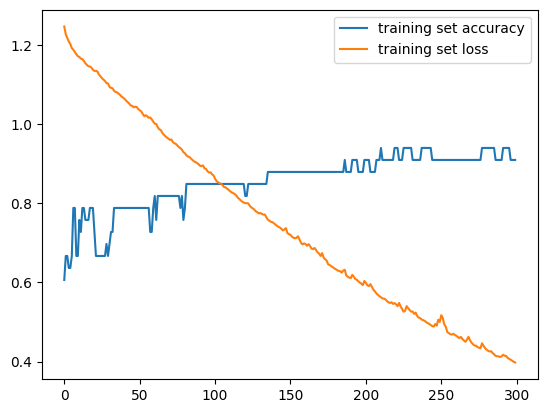

In [77]:
#model Analysis
#plotting model 
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [86]:
import random

while True:
  texts_p=[]
  prediction_input = input("you: ")

  #removing punctuation
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenization and padding 

  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the rigt tag
  response_tag = le.inverse_transform([output])[0]
  print("Fastly : ", random.choice(responses[response_tag]))

  if response_tag == 'goodbye':
    break


you: bye
1/1 [==============================] - 1s 845ms/step
Fastly :  Have a nice day


In [75]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

In [79]:
#training the model
train = model.fit(x_train,y_train, epochs = 300)


Epoch 1/300
2/2 [==============================] - 0s 19ms/step - loss: 0.3965 - accuracy: 0.9091
Epoch 2/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3953 - accuracy: 0.9091
Epoch 3/300
2/2 [==============================] - 0s 19ms/step - loss: 0.3983 - accuracy: 0.9091
Epoch 4/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4013 - accuracy: 0.9091
Epoch 5/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3993 - accuracy: 0.9091
Epoch 6/300
2/2 [==============================] - 0s 16ms/step - loss: 0.3983 - accuracy: 0.9091
Epoch 7/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4087 - accuracy: 0.9091
Epoch 8/300
2/2 [==============================] - 0s 16ms/step - loss: 0.4021 - accuracy: 0.9091
Epoch 9/300
2/2 [==============================] - 0s 19ms/step - loss: 0.3965 - accuracy: 0.9091
Epoch 10/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3926 - accuracy: 0.9091
Epoch 11/300
2/2 [=

In [80]:
import random

while True:
  texts_p=[]
  prediction_input = input("you: ")

  #removing punctuation
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenization and padding 

  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the rigt tag
  response_tag = le.inverse_transform([output])[0]
  print("Fastly : ", random.choice(responses[response_tag]))

  if response_tag == 'goodbye':
    break


you: hi 
1/1 [==============================] - 0s 25ms/step
Fastly :  Hey :-)
you: which program fast offer ?
1/1 [==============================] - 0s 23ms/step
Fastly :  Fast offers Admission in june and july every year
you: which Program ?
1/1 [==============================] - 0s 24ms/step
Fastly :  Any time!
you: when does fast offers admission ?
1/1 [==============================] - 0s 35ms/step
Fastly :  Fast offers Admission in june and july every year
you: okay thank you 
1/1 [==============================] - 0s 28ms/step
Fastly :  Any time!
you: what is fee structure 
1/1 [==============================] - 0s 28ms/step
Fastly :  for all the programs 1 hour per credit hour is 8500
you: how to apply ?
1/1 [==============================] - 0s 30ms/step
Fastly :  Hey :-)
you: okay bye 
1/1 [==============================] - 0s 23ms/step
Fastly :  Bye! Come back again soon.


In [83]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [85]:
#training the model
train = model.fit(x_train,y_train, epochs = 500)


Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0981 - accuracy: 0.9697
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0990 - accuracy: 0.9697
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1001 - accuracy: 0.9697
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1009 - accuracy: 0.9697
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1008 - accuracy: 0.9697
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1013 - accuracy: 0.9697
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1016 - accuracy: 0.9697
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1013 - accuracy: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1014 - accuracy: 0.9697
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 0.1029 - accuracy: 0.9697
Epoch 11/500
2/2 [==